In [1]:
#importer les biblio
import sklearn.metrics as metrics
import sklearn
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import pyplot
import scikitplot as skplt
import statsmodels as sm
from sklearn import svm
import string
import re
import sys
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import GridSearchCV
np.random.seed(0)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## 1) Data visualisation :

In [2]:
cd C:/Users/ASUS/Desktop

C:\Users\ASUS\Desktop


In [3]:
# Read in data and display first 5 rows
data = pd.read_csv("probleme card.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

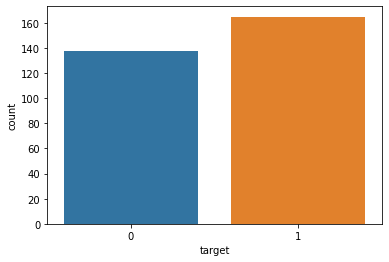

In [5]:
sb.countplot(x='target',data=data)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [105]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'target')])

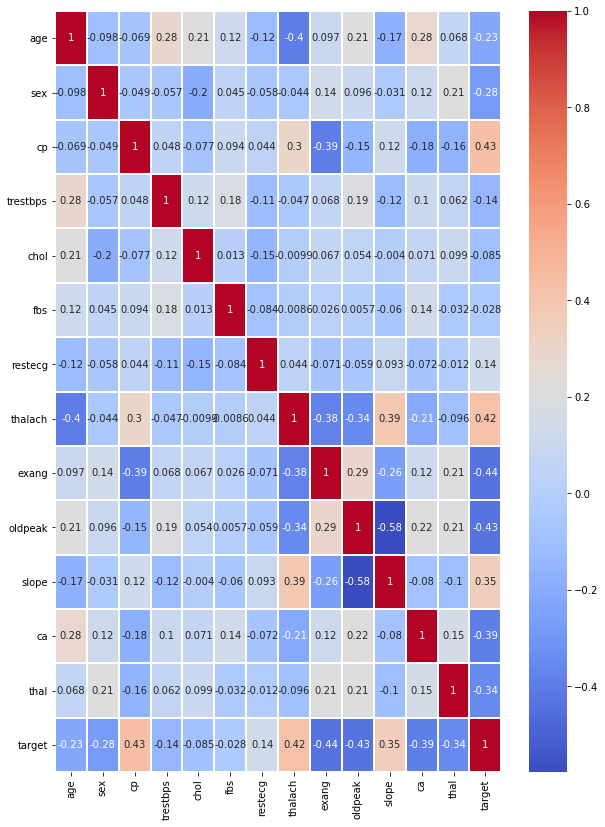

In [9]:
fig,ax = plt.subplots(figsize=(10,14))
ax = sb.heatmap(data.corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.yticks(rotation=0)

# 2) Machine learning applications before data engineering:

# a) model preparation

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
X_data = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_data = data['target']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3, stratify=y_data)

In [13]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3, stratify=y_train)

# b) Random forest:

In [14]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [15]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [20]:
#Predict the response for test dataset
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

[[32  9]
 [ 6 44]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

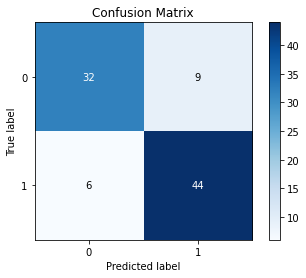

In [21]:
print(metrics.confusion_matrix(y_test,predictions))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_test,predictions)

In [22]:
acc = metrics.accuracy_score(y_test, predictions)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(y_test, predictions)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(y_test, predictions)
print("Precision = %.2f" %(p))
r = metrics.recall_score(y_test, predictions)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(y_test, predictions)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(y_test, predictions)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.84
F1 = 0.85
Precision = 0.83
Recall = 0.88
log-loss = 5.69
ROC-AUC = 0.83


# c) Adaboost classifier:

In [23]:
ad=AdaBoostClassifier(base_estimator=clf)

In [24]:
ad.fit(X_test,y_test)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         random_state=0))

In [25]:
y_pred = ad.predict(X_val)

[[21  8]
 [ 3 32]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

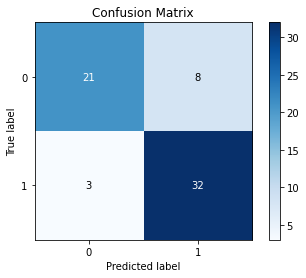

In [27]:
print(metrics.confusion_matrix(y_val,y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_val,y_pred)

In [28]:
acc = metrics.accuracy_score(y_val,y_pred)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(y_val,y_pred)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(y_val,y_pred)
print("Precision = %.2f" %(p))
r = metrics.recall_score(y_val,y_pred)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(y_val,y_pred)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(y_val,y_pred)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.83
F1 = 0.85
Precision = 0.80
Recall = 0.91
log-loss = 5.94
ROC-AUC = 0.82


# d) SVM:

In [29]:
SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM.predict(X_test)

[[33  8]
 [10 40]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

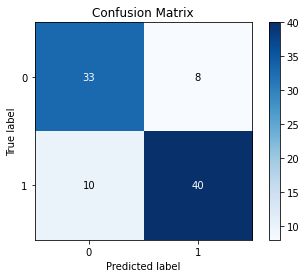

In [30]:
print(metrics.confusion_matrix(y_test, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [31]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8021978021978022
Precision: 0.8333333333333334
Recall: 0.8


# e) Gradient Boosting Classifier

In [32]:
gb_clf = GradientBoostingClassifier(n_estimators=60, learning_rate=0.09, max_depth=3, random_state=0).fit(X_train, y_train)

In [33]:
gb_clf.score(X_test, y_test)

0.8351648351648352

# f) Logistic regression:

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(X_train,y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [88]:
y_pred = modele_logit.predict(X_test)

[[32  9]
 [ 7 43]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

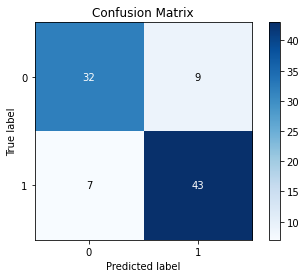

In [89]:
print(metrics.confusion_matrix(y_test, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [90]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8241758241758241
Precision: 0.8269230769230769
Recall: 0.86


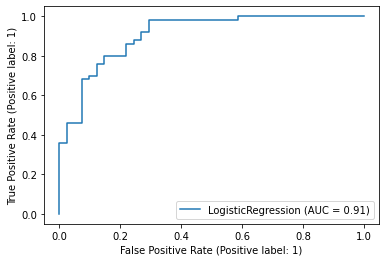

In [91]:
import scikitplot as skplt
import matplotlib.pyplot as plt

metrics.plot_roc_curve(modele_logit, X_test, y_test)
plt.show()

# 3) data engineering

## The goal is to transform a data to bainier data of 0 or 1

In [7]:
data.groupby('slope')['target'].sum()

slope
0      9
1     49
2    107
Name: target, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='target'>

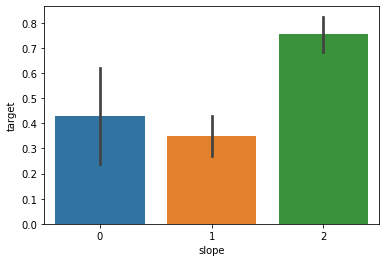

In [8]:
sb.barplot(x='slope',y='target',data=data)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

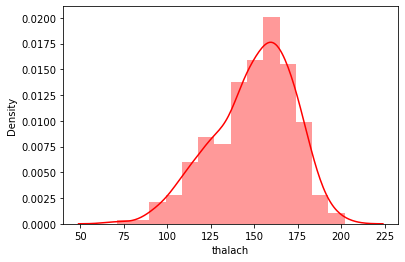

In [9]:
sb.distplot(data['thalach'],color='red')

In [10]:
data.groupby('cp')['target'].sum()

cp
0    39
1    41
2    69
3    16
Name: target, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='target'>

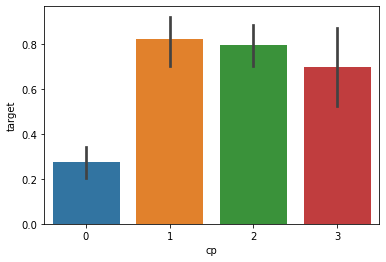

In [11]:
sb.barplot(x='cp',y='target',data=data)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

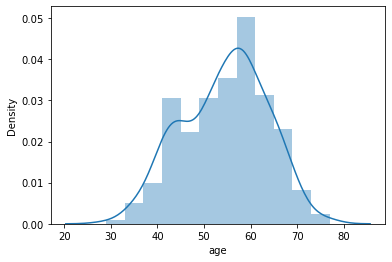

In [12]:
sb.distplot(data['age'])

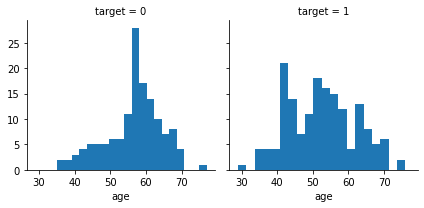

In [13]:
#age
g= sb.FacetGrid(data,col='target')
g.map(plt.hist,'age',bins=20)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


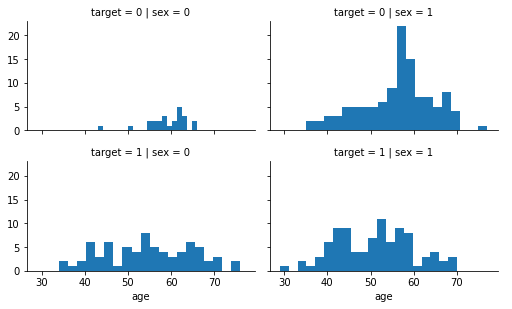

In [14]:
grid = sb.FacetGrid(data, row='target', col='sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age',  bins=20)
grid.add_legend()

In [15]:
data['AgeBand'] = pd.cut(data['age'], 5)
data[['AgeBand', 'target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,target
0,"(28.952, 38.6]",0.750000
1,"(38.6, 48.2]",0.704225
2,"(48.2, 57.8]",0.577320
3,"(57.8, 67.4]",0.377358
4,"(67.4, 77.0]",0.588235


In [16]:
data.loc[ data['age'] < 38.6, 'age_group'] = 1
data.loc[(data['age'] >= 38.6) & (data['age'] < 48.2), 'age_group'] = 2
data.loc[(data['age'] >= 48.2) & (data['age'] < 57.8), 'age_group'] = 3
data.loc[(data['age'] >= 57.8) & (data['age'] < 67.4), 'age_group'] = 4
data.loc[ data['age'] >= 67.4, 'age_group'] = 5
data['age_group'].astype('int')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeBand,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(57.8, 67.4]",4.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(28.952, 38.6]",1.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(38.6, 48.2]",2.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(48.2, 57.8]",3.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(48.2, 57.8]",3.0


In [17]:
#drop age and AgeBand
data.drop(['age','AgeBand'] , axis= 1,inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


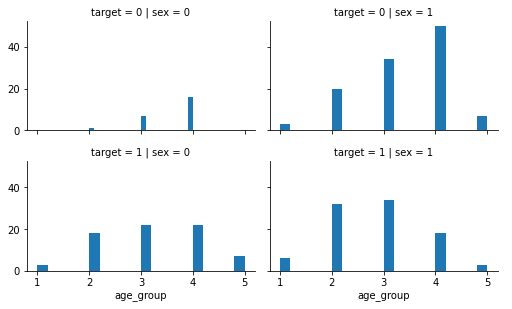

In [18]:
grid = sb.FacetGrid(data, row='target', col='sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age_group',  bins=20)
grid.add_legend()

In [19]:
#change age_group to be dummy column
data = pd.get_dummies(data, columns = ['age_group'], prefix="AgeGrp")
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,0,0
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,0,1,0,0
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,1,0,0


In [20]:
data = pd.get_dummies(data,columns = ['sex'], prefix="Sex")

In [21]:
data['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
data = pd.get_dummies(data,columns = ['restecg'], prefix="Restecg")

In [23]:
data = pd.get_dummies(data,columns = ['cp'], prefix="CP")

In [24]:
data = pd.get_dummies(data,columns = ['slope'], prefix="Slope")

In [25]:
data = pd.get_dummies(data,columns = ['ca'], prefix="Ca")

In [26]:
data = pd.get_dummies(data,columns = ['thal'], prefix="Thal")

In [27]:
data.head()

,trestbps,chol,fbs,thalach,exang,oldpeak,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,...,Slope_2,Ca_0,Ca_1,Ca_2,Ca_3,Ca_4,Thal_0,Thal_1,Thal_2,Thal_3
0,145,233,1,150,0,2.3,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,130,250,0,187,0,3.5,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,130,204,0,172,0,1.4,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,120,236,0,178,0,0.8,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,120,354,0,163,1,0.6,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

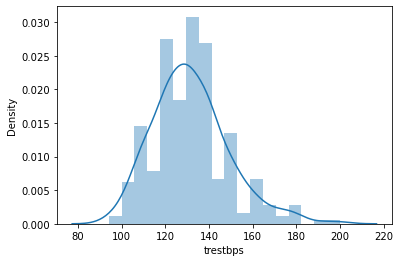

In [28]:
sb.distplot(data['trestbps'])

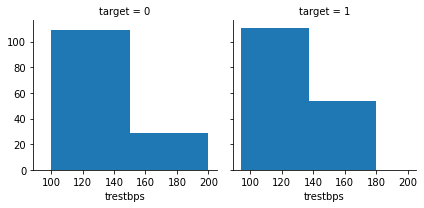

In [29]:
#trestbps
g= sb.FacetGrid(data,col='target')
g.map(plt.hist,'trestbps',bins=2)

In [30]:
data['TrestbpsBand'] = pd.cut(data['trestbps'], 2)
data[['TrestbpsBand', 'target']].groupby(['TrestbpsBand'], as_index=False).mean().sort_values(by='TrestbpsBand', ascending=True)

,TrestbpsBand,target
0,"(93.894, 147.0]",0.568000
1,"(147.0, 200.0]",0.433962


In [31]:
data.loc[ data['trestbps'] <= 147.0, 'trestbps_group'] = 1
data.loc[ data['trestbps'] > 147.0, 'trestbps_group'] = 2
data['trestbps_group'].astype('int')
data.head()

,trestbps,chol,fbs,thalach,exang,oldpeak,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,...,Ca_1,Ca_2,Ca_3,Ca_4,Thal_0,Thal_1,Thal_2,Thal_3,TrestbpsBand,trestbps_group
0,145,233,1,150,0,2.3,1,0,0,0,...,0,0,0,0,0,1,0,0,"(93.894, 147.0]",1.0
1,130,250,0,187,0,3.5,1,1,0,0,...,0,0,0,0,0,0,1,0,"(93.894, 147.0]",1.0
2,130,204,0,172,0,1.4,1,0,1,0,...,0,0,0,0,0,0,1,0,"(93.894, 147.0]",1.0
3,120,236,0,178,0,0.8,1,0,0,1,...,0,0,0,0,0,0,1,0,"(93.894, 147.0]",1.0
4,120,354,0,163,1,0.6,1,0,0,1,...,0,0,0,0,0,0,1,0,"(93.894, 147.0]",1.0


In [32]:
#drop age and AgeBand
data.drop(['trestbps','TrestbpsBand'] , axis= 1,inplace=True)

In [33]:
#change trestbps_group to be dummy column
data = pd.get_dummies(data, columns = ['trestbps_group'], prefix="TrestbpsGrp")
data.head()

,chol,fbs,thalach,exang,oldpeak,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,...,Ca_1,Ca_2,Ca_3,Ca_4,Thal_0,Thal_1,Thal_2,Thal_3,TrestbpsGrp_1.0,TrestbpsGrp_2.0
0,233,1,150,0,2.3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,250,0,187,0,3.5,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,204,0,172,0,1.4,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,236,0,178,0,0.8,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,354,0,163,1,0.6,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

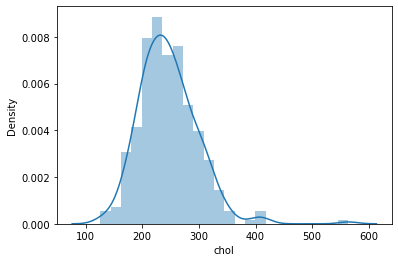

In [34]:
sb.distplot(data['chol'])

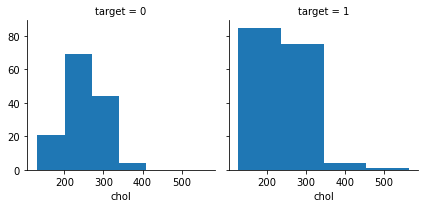

In [35]:
#chol
g= sb.FacetGrid(data,col='target')
g.map(plt.hist,'chol',bins=4)

In [36]:
data['CholBand'] = pd.cut(data['chol'], 4)
data[['CholBand', 'target']].groupby(['CholBand'], as_index=False).mean().sort_values(by='CholBand', ascending=True)

,CholBand,target
0,"(125.562, 235.5]",0.607143
1,"(235.5, 345.0]",0.483871
2,"(345.0, 454.5]",0.571429
3,"(454.5, 564.0]",1.000000


In [37]:
data.loc[ data['chol'] < 235.5, 'chol_group'] = 1
data.loc[(data['chol'] >= 235.5) & (data['chol'] < 345.0), 'chol_group'] = 2
data.loc[(data['chol'] >= 345.0) & (data['chol'] < 454.5), 'chol_group'] = 3
data.loc[ data['chol'] >= 454.5, 'chol_group'] = 4
data['chol_group'].astype('int')
data.head()

,chol,fbs,thalach,exang,oldpeak,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,...,Ca_3,Ca_4,Thal_0,Thal_1,Thal_2,Thal_3,TrestbpsGrp_1.0,TrestbpsGrp_2.0,CholBand,chol_group
0,233,1,150,0,2.3,1,0,0,0,1,...,0,0,0,1,0,0,1,0,"(125.562, 235.5]",1.0
1,250,0,187,0,3.5,1,1,0,0,0,...,0,0,0,0,1,0,1,0,"(235.5, 345.0]",2.0
2,204,0,172,0,1.4,1,0,1,0,0,...,0,0,0,0,1,0,1,0,"(125.562, 235.5]",1.0
3,236,0,178,0,0.8,1,0,0,1,0,...,0,0,0,0,1,0,1,0,"(235.5, 345.0]",2.0
4,354,0,163,1,0.6,1,0,0,1,0,...,0,0,0,0,1,0,1,0,"(345.0, 454.5]",3.0


In [38]:
#drop age and AgeBand
data.drop(['chol','CholBand'] , axis= 1,inplace=True)

In [39]:
#change trestbps_group to be dummy column
data = pd.get_dummies(data, columns = ['chol_group'], prefix="CholGrp")
data.head()

,fbs,thalach,exang,oldpeak,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,...,Thal_0,Thal_1,Thal_2,Thal_3,TrestbpsGrp_1.0,TrestbpsGrp_2.0,CholGrp_1.0,CholGrp_2.0,CholGrp_3.0,CholGrp_4.0
0,1,150,0,2.3,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,0,187,0,3.5,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0,172,0,1.4,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,0,178,0,0.8,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,163,1,0.6,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

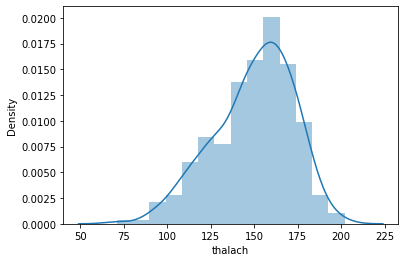

In [40]:
sb.distplot(data['thalach'])

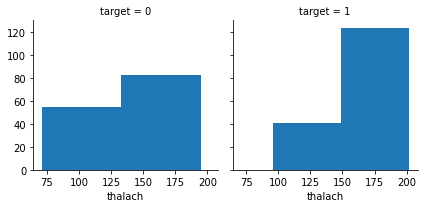

In [41]:
#thalach
g= sb.FacetGrid(data,col='target')
g.map(plt.hist,'thalach',bins=2)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


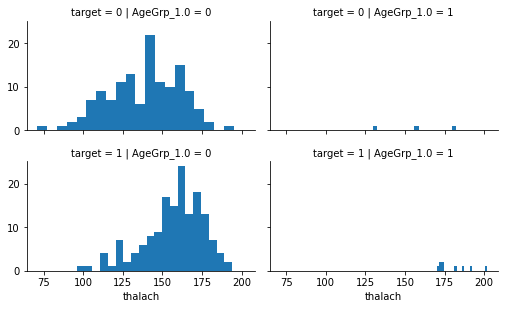

In [42]:
grid = sb.FacetGrid(data, row='target', col='AgeGrp_1.0', size=2.2, aspect=1.6)
grid.map(plt.hist, 'thalach',  bins=20)
grid.add_legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


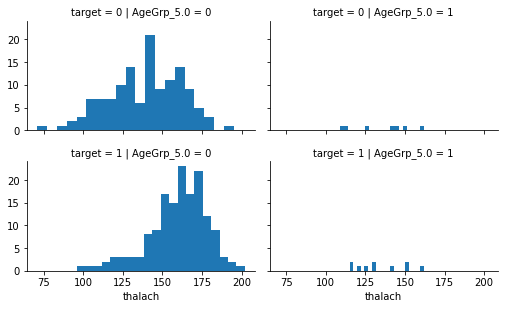

In [43]:
grid = sb.FacetGrid(data, row='target', col='AgeGrp_5.0', size=2.2, aspect=1.6)
grid.map(plt.hist, 'thalach',  bins=20)
grid.add_legend()

In [44]:
data['ThalachBand'] = pd.cut(data['thalach'], 5)
data[['ThalachBand', 'target']].groupby(['ThalachBand'], as_index=False).mean().sort_values(by='ThalachBand', ascending=True)

,ThalachBand,target
0,"(70.869, 97.2]",0.142857
1,"(97.2, 123.4]",0.297297
2,"(123.4, 149.6]",0.352273
3,"(149.6, 175.8]",0.678571
4,"(175.8, 202.0]",0.870968


In [45]:
data.loc[ data['thalach'] < 97.2, 'thalach_group'] = 1
data.loc[(data['thalach'] >= 97.2) & (data['thalach'] < 123.4), 'thalach_group'] = 2
data.loc[(data['thalach'] >= 123.4) & (data['thalach'] < 149.6), 'thalach_group'] = 3
data.loc[(data['thalach'] >= 149.6) & (data['thalach'] < 175.8), 'thalach_group'] = 4
data.loc[ data['thalach'] >= 175.8, 'thalach_group'] = 5
data['thalach_group'].astype('int')
data.head()

,fbs,thalach,exang,oldpeak,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,...,Thal_2,Thal_3,TrestbpsGrp_1.0,TrestbpsGrp_2.0,CholGrp_1.0,CholGrp_2.0,CholGrp_3.0,CholGrp_4.0,ThalachBand,thalach_group
0,1,150,0,2.3,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,"(149.6, 175.8]",4.0
1,0,187,0,3.5,1,1,0,0,0,0,...,1,0,1,0,0,1,0,0,"(175.8, 202.0]",5.0
2,0,172,0,1.4,1,0,1,0,0,0,...,1,0,1,0,1,0,0,0,"(149.6, 175.8]",4.0
3,0,178,0,0.8,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,"(175.8, 202.0]",5.0
4,0,163,1,0.6,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,"(149.6, 175.8]",4.0


In [46]:
#drop age and AgeBand
data.drop(['thalach','ThalachBand'] , axis= 1,inplace=True)

In [47]:
#change trestbps_group to be dummy column
data = pd.get_dummies(data, columns = ['thalach_group'], prefix="ThalachGrp")
data.head()

,fbs,exang,oldpeak,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,Sex_0,...,TrestbpsGrp_2.0,CholGrp_1.0,CholGrp_2.0,CholGrp_3.0,CholGrp_4.0,ThalachGrp_1.0,ThalachGrp_2.0,ThalachGrp_3.0,ThalachGrp_4.0,ThalachGrp_5.0
0,1,0,2.3,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,3.5,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1.4,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0.8,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,0.6,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

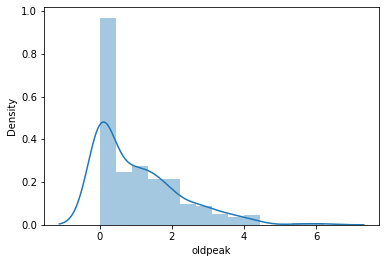

In [48]:
sb.distplot(data['oldpeak'])

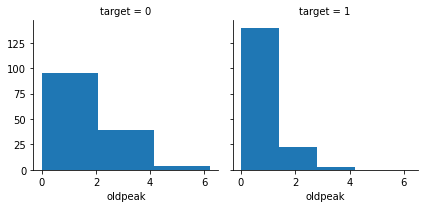

In [49]:
#thalach
g= sb.FacetGrid(data,col='target')
g.map(plt.hist,'oldpeak',bins=3)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


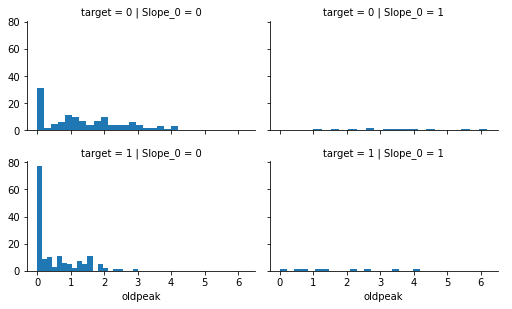

In [50]:
grid = sb.FacetGrid(data, row='target', col='Slope_0', size=2.2, aspect=1.6)
grid.map(plt.hist, 'oldpeak',  bins=20)
grid.add_legend()

In [51]:
data['OldpeakBand'] = pd.cut(data['oldpeak'], 3)
data[['OldpeakBand', 'target']].groupby(['OldpeakBand'], as_index=False).mean().sort_values(by='OldpeakBand', ascending=True)

,OldpeakBand,target
0,"(-0.0062, 2.067]",0.624506
1,"(2.067, 4.133]",0.133333
2,"(4.133, 6.2]",0.200000


In [52]:
data.loc[ data['oldpeak'] <2.067, 'oldpeak_group'] = 1
data.loc[(data['oldpeak'] >=2.067) & (data['oldpeak'] < 4.133), 'oldpeak_group'] = 2
data.loc[ data['oldpeak'] >= 4.133, 'oldpeak_group'] = 3
data['oldpeak_group'].astype('int')
data.head()

,fbs,exang,oldpeak,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,Sex_0,...,CholGrp_2.0,CholGrp_3.0,CholGrp_4.0,ThalachGrp_1.0,ThalachGrp_2.0,ThalachGrp_3.0,ThalachGrp_4.0,ThalachGrp_5.0,OldpeakBand,oldpeak_group
0,1,0,2.3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,"(2.067, 4.133]",2.0
1,0,0,3.5,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,"(2.067, 4.133]",2.0
2,0,0,1.4,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,"(-0.0062, 2.067]",1.0
3,0,0,0.8,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,"(-0.0062, 2.067]",1.0
4,0,1,0.6,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,"(-0.0062, 2.067]",1.0


In [53]:
#drop age and AgeBand
data.drop(['oldpeak','OldpeakBand'] , axis= 1,inplace=True)

In [54]:
#change trestbps_group to be dummy column
data = pd.get_dummies(data, columns = ['oldpeak_group'], prefix="OldpeakGrp")
data.head()

,fbs,exang,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,Sex_0,Sex_1,...,CholGrp_3.0,CholGrp_4.0,ThalachGrp_1.0,ThalachGrp_2.0,ThalachGrp_3.0,ThalachGrp_4.0,ThalachGrp_5.0,OldpeakGrp_1.0,OldpeakGrp_2.0,OldpeakGrp_3.0
0,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,0,1,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [55]:
#drop age and AgeBand
data = pd.get_dummies(data,columns = ['fbs'], prefix="Fbs")


In [56]:
data = pd.get_dummies(data,columns = ['exang'], prefix="Exang")

In [57]:
data = pd.get_dummies(data,columns = ['target'], prefix="Target")

In [58]:
data.head()

,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,Sex_0,Sex_1,Restecg_0,Restecg_1,Restecg_2,...,ThalachGrp_5.0,OldpeakGrp_1.0,OldpeakGrp_2.0,OldpeakGrp_3.0,Fbs_0,Fbs_1,Exang_0,Exang_1,Target_0,Target_1
0,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,1,1,0,0,1
1,1,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
3,0,0,1,0,0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1


In [59]:
data.columns

Index(['AgeGrp_1.0', 'AgeGrp_2.0', 'AgeGrp_3.0', 'AgeGrp_4.0', 'AgeGrp_5.0',
       'Sex_0', 'Sex_1', 'Restecg_0', 'Restecg_1', 'Restecg_2', 'CP_0', 'CP_1',
       'CP_2', 'CP_3', 'Slope_0', 'Slope_1', 'Slope_2', 'Ca_0', 'Ca_1', 'Ca_2',
       'Ca_3', 'Ca_4', 'Thal_0', 'Thal_1', 'Thal_2', 'Thal_3',
       'TrestbpsGrp_1.0', 'TrestbpsGrp_2.0', 'CholGrp_1.0', 'CholGrp_2.0',
       'CholGrp_3.0', 'CholGrp_4.0', 'ThalachGrp_1.0', 'ThalachGrp_2.0',
       'ThalachGrp_3.0', 'ThalachGrp_4.0', 'ThalachGrp_5.0', 'OldpeakGrp_1.0',
       'OldpeakGrp_2.0', 'OldpeakGrp_3.0', 'Fbs_0', 'Fbs_1', 'Exang_0',
       'Exang_1', 'Target_0', 'Target_1'],
      dtype='object')

In [60]:
data['Target_1']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: Target_1, Length: 303, dtype: uint8

# association rule

In [61]:
data

,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,Sex_0,Sex_1,Restecg_0,Restecg_1,Restecg_2,...,ThalachGrp_5.0,OldpeakGrp_1.0,OldpeakGrp_2.0,OldpeakGrp_3.0,Fbs_0,Fbs_1,Exang_0,Exang_1,Target_0,Target_1
0,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,1,1,0,0,1
1,1,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
3,0,0,1,0,0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
299,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
300,0,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
301,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0


In [64]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth





#frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)
### alternatively:
frequent_itemsets = apriori(data, min_support=0.3, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.6, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.320132,(AgeGrp_3.0)
1,0.349835,(AgeGrp_4.0)
2,0.316832,(Sex_0)
3,0.683168,(Sex_1)
4,0.485149,(Restecg_0)
...,...,...
244,0.326733,"(Exang_0, TrestbpsGrp_1.0, OldpeakGrp_1.0, Fbs..."
245,0.330033,"(TrestbpsGrp_1.0, OldpeakGrp_1.0, Fbs_0, Targe..."
246,0.323432,"(Exang_0, TrestbpsGrp_1.0, OldpeakGrp_1.0, Tar..."
247,0.323432,"(Exang_0, OldpeakGrp_1.0, Fbs_0, Target_1, Tha..."


In [65]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sex_1),(Thal_3),0.683168,0.386139,0.336634,0.492754,1.276106,0.072836,1.210184
1,(Thal_3),(Sex_1),0.386139,0.683168,0.336634,0.871795,1.276106,0.072836,2.471287
2,(Target_0),(Sex_1),0.455446,0.683168,0.376238,0.826087,1.209200,0.065092,1.821782
3,(Sex_1),(Target_0),0.683168,0.455446,0.376238,0.550725,1.209200,0.065092,1.212073
4,(Target_0),(CP_0),0.455446,0.471947,0.343234,0.753623,1.596838,0.128288,2.143273
...,...,...,...,...,...,...,...,...,...
669,"(OldpeakGrp_1.0, Fbs_0)","(TrestbpsGrp_1.0, Target_1, Exang_0)",0.712871,0.399340,0.346535,0.486111,1.217287,0.061857,1.168852
670,"(Target_1, OldpeakGrp_1.0)","(TrestbpsGrp_1.0, Fbs_0, Exang_0)",0.521452,0.485149,0.346535,0.664557,1.369801,0.093553,1.534840
671,"(Target_1, Fbs_0)","(TrestbpsGrp_1.0, OldpeakGrp_1.0, Exang_0)",0.468647,0.511551,0.346535,0.739437,1.445479,0.106798,1.874587
672,(Exang_0),"(TrestbpsGrp_1.0, OldpeakGrp_1.0, Target_1, Fb...",0.673267,0.409241,0.346535,0.514706,1.257709,0.071006,1.217322


In [66]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,(Sex_1),(Thal_3),0.683168,0.386139,0.336634,0.492754,1.276106,0.072836,1.210184,1,1
1,(Thal_3),(Sex_1),0.386139,0.683168,0.336634,0.871795,1.276106,0.072836,2.471287,1,1
2,(Target_0),(Sex_1),0.455446,0.683168,0.376238,0.826087,1.209200,0.065092,1.821782,1,1
3,(Sex_1),(Target_0),0.683168,0.455446,0.376238,0.550725,1.209200,0.065092,1.212073,1,1
4,(Target_0),(CP_0),0.455446,0.471947,0.343234,0.753623,1.596838,0.128288,2.143273,1,1
...,...,...,...,...,...,...,...,...,...,...,...
669,"(OldpeakGrp_1.0, Fbs_0)","(TrestbpsGrp_1.0, Target_1, Exang_0)",0.712871,0.399340,0.346535,0.486111,1.217287,0.061857,1.168852,2,3
670,"(Target_1, OldpeakGrp_1.0)","(TrestbpsGrp_1.0, Fbs_0, Exang_0)",0.521452,0.485149,0.346535,0.664557,1.369801,0.093553,1.534840,2,3
671,"(Target_1, Fbs_0)","(TrestbpsGrp_1.0, OldpeakGrp_1.0, Exang_0)",0.468647,0.511551,0.346535,0.739437,1.445479,0.106798,1.874587,2,3
672,(Exang_0),"(TrestbpsGrp_1.0, OldpeakGrp_1.0, Target_1, Fb...",0.673267,0.409241,0.346535,0.514706,1.257709,0.071006,1.217322,1,4


In [67]:
rules=rules[ (rules['antecedent_len'] < 4) &
            (rules['consequents_len'] == 1)&
        (rules['confidence']>0.9)&
       (rules['lift'] > 1.2)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
228,"(TrestbpsGrp_1.0, Ca_0, Thal_2)",(Target_1),0.323432,0.544554,0.300330,0.928571,1.705195,0.124204,6.376238,3,1
262,"(OldpeakGrp_1.0, Ca_0, Thal_2)",(Target_1),0.353135,0.544554,0.323432,0.915888,1.681903,0.131131,5.414741,3,1


In [68]:
antecedent_sele = rules['antecedents'] == frozenset({'AgeGrp_1.0', 'AgeGrp_2.0', 'AgeGrp_3.0', 'AgeGrp_4.0', 'AgeGrp_5.0',
       'Sex_0', 'Sex_1', 'Restecg_0', 'Restecg_1', 'Restecg_2', 'CP_0', 'CP_1',
       'CP_2', 'CP_3', 'Slope_0', 'Slope_1', 'Slope_2', 'Ca_0', 'Ca_1', 'Ca_2',
       'Ca_3', 'Ca_4', 'Thal_0', 'Thal_1', 'Thal_2', 'Thal_3',
       'TrestbpsGrp_1.0', 'TrestbpsGrp_2.0', 'CholGrp_1.0', 'CholGrp_2.0',
       'CholGrp_3.0', 'CholGrp_4.0', 'ThalachGrp_1.0', 'ThalachGrp_2.0',
       'ThalachGrp_3.0', 'ThalachGrp_4.0', 'ThalachGrp_5.0', 'OldpeakGrp_1.0',
       'OldpeakGrp_2.0', 'OldpeakGrp_3.0', 'Fbs_0', 'Fbs_1', 'Exang_0',
       'Exang_1'}) # or  frozenset({'Kidney Beans', 'Onion'})
consequent_sele = rules['consequents'] == frozenset({'Target_1'})  
#final_sele = (consequent_sele)

f=rules.loc[consequent_sele]
f



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
228,"(TrestbpsGrp_1.0, Ca_0, Thal_2)",(Target_1),0.323432,0.544554,0.300330,0.928571,1.705195,0.124204,6.376238,3,1
262,"(OldpeakGrp_1.0, Ca_0, Thal_2)",(Target_1),0.353135,0.544554,0.323432,0.915888,1.681903,0.131131,5.414741,3,1


# 4) Machine learning applications after data engineering:

# a) Data Preparation:

In [70]:
data.columns

Index(['fbs', 'exang', 'target', 'AgeGrp_1.0', 'AgeGrp_2.0', 'AgeGrp_3.0',
       'AgeGrp_4.0', 'AgeGrp_5.0', 'Sex_0', 'Sex_1', 'Restecg_0', 'Restecg_1',
       'Restecg_2', 'CP_0', 'CP_1', 'CP_2', 'CP_3', 'Slope_0', 'Slope_1',
       'Slope_2', 'Ca_0', 'Ca_1', 'Ca_2', 'Ca_3', 'Ca_4', 'Thal_0', 'Thal_1',
       'Thal_2', 'Thal_3', 'TrestbpsGrp_1.0', 'TrestbpsGrp_2.0', 'CholGrp_1.0',
       'CholGrp_2.0', 'CholGrp_3.0', 'CholGrp_4.0', 'ThalachGrp_1.0',
       'ThalachGrp_2.0', 'ThalachGrp_3.0', 'ThalachGrp_4.0', 'ThalachGrp_5.0',
       'OldpeakGrp_1.0', 'OldpeakGrp_2.0', 'OldpeakGrp_3.0'],
      dtype='object')

In [71]:
X_data = data[['fbs', 'exang', 'AgeGrp_1.0', 'AgeGrp_2.0', 'AgeGrp_3.0',
       'AgeGrp_4.0', 'AgeGrp_5.0', 'Sex_0', 'Sex_1', 'Restecg_0', 'Restecg_1',
       'Restecg_2', 'CP_0', 'CP_1', 'CP_2', 'CP_3', 'Slope_0', 'Slope_1',
       'Slope_2', 'Ca_0', 'Ca_1', 'Ca_2', 'Ca_3', 'Ca_4', 'Thal_0', 'Thal_1',
       'Thal_2', 'Thal_3', 'TrestbpsGrp_1.0', 'TrestbpsGrp_2.0', 'CholGrp_1.0',
       'CholGrp_2.0', 'CholGrp_3.0', 'CholGrp_4.0', 'ThalachGrp_1.0',
       'ThalachGrp_2.0', 'ThalachGrp_3.0', 'ThalachGrp_4.0', 'ThalachGrp_5.0',
       'OldpeakGrp_1.0', 'OldpeakGrp_2.0', 'OldpeakGrp_3.0']]
y_data = data['target']

In [91]:
X_data

,fbs,exang,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,Sex_0,Sex_1,Restecg_0,...,CholGrp_3.0,CholGrp_4.0,ThalachGrp_1.0,ThalachGrp_2.0,ThalachGrp_3.0,ThalachGrp_4.0,ThalachGrp_5.0,OldpeakGrp_1.0,OldpeakGrp_2.0,OldpeakGrp_3.0
0,1,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
300,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
301,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [92]:
y_data

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3, stratify=y_data)

In [95]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3, stratify=y_train)

# b) Decision tree:

>1, train: 0.802, test: 0.800
>2, train: 0.824, test: 0.622
>3, train: 0.923, test: 0.711
>4, train: 0.934, test: 0.711
>5, train: 0.978, test: 0.711
>6, train: 0.989, test: 0.667
>7, train: 1.000, test: 0.733
>8, train: 1.000, test: 0.644
>9, train: 1.000, test: 0.644
>10, train: 1.000, test: 0.667
>11, train: 1.000, test: 0.733
>12, train: 1.000, test: 0.667
>13, train: 1.000, test: 0.689


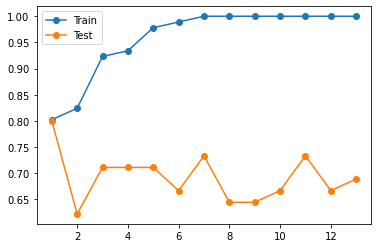

In [96]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 14)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_test, y_test)
    # evaluate on the train dataset
    train_yhat = model.predict(X_test)
    train_acc = accuracy_score(y_test, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_val)
    test_acc = accuracy_score(y_val, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

# c) Random forest classifier:

In [97]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [98]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [99]:
#Predict the response for test dataset
predictions = clf.predict(X_test)
predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1], dtype=int64)

[[34  7]
 [11 39]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

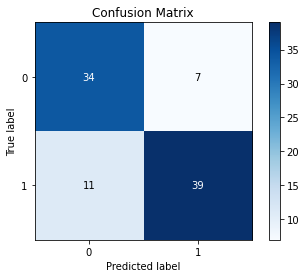

In [100]:
print(metrics.confusion_matrix(y_test, predictions))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_test, predictions)

In [101]:
acc = metrics.accuracy_score(y_test, predictions)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(y_test, predictions)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(y_test, predictions)
print("Precision = %.2f" %(p))
r = metrics.recall_score(y_test, predictions)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(y_test, predictions)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(y_test, predictions)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.80
F1 = 0.81
Precision = 0.85
Recall = 0.78
log-loss = 6.83
ROC-AUC = 0.80


In [126]:
def overfitting(X_train,y_train,X_val,y_val,model):
    er_tr=list()
    er_val=list()
    m=X_train.shape[0]
    for i in range(10,m):
        x,y=X_train.iloc[:i,:],y_train.iloc[:i]
        model.fit(x,y)

        predictions_train=model.predict(X_train)
        predictions_val=model.predict(X_val)
        error_train=(y_train != predictions_train).mean()
        error_val=(y_val != predictions_val).mean()
        er_tr.append(error_train)
        er_val.append(error_val)
    return er_tr,er_val

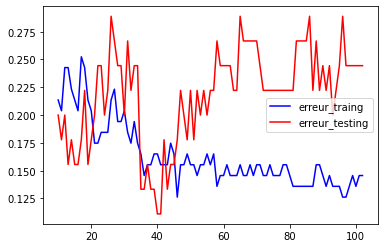

In [122]:
m=X_train.shape[0]
er_tr,er_val=overfitting(X_train,y_train,X_val,y_val,model=clf)
plt.plot(range(10,m),er_tr, 'b-',label='erreur_traing' )
plt.plot(range(10,m),er_val,'r-',label='erreur_testing' )
plt.legend()
plt.show()

# d) Adaboost classifier:

In [104]:
 ad=AdaBoostClassifier(base_estimator=clf)

In [105]:
ad.fit(X_test,y_test)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         random_state=0))

In [106]:
y_pred = ad.predict(X_val)

[[16  5]
 [ 5 19]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

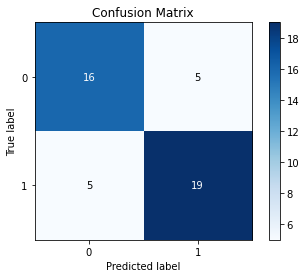

In [107]:
print(metrics.confusion_matrix(y_val,y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_val,y_pred)

In [109]:
acc = metrics.accuracy_score(y_val,y_pred)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(y_val,y_pred)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(y_val,y_pred)
print("Precision = %.2f" %(p))
r = metrics.recall_score(y_val,y_pred)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(y_val,y_pred)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(y_val,y_pred)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.78
F1 = 0.79
Precision = 0.79
Recall = 0.79
log-loss = 7.68
ROC-AUC = 0.78


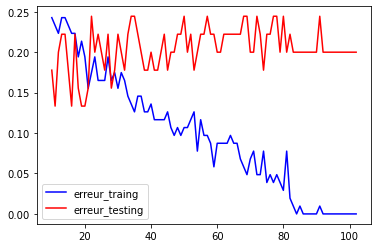

In [123]:
m=X_train.shape[0]
er_tr,er_val=overfitting(X_train,y_train,X_val,y_val,model=ad)
plt.plot(range(10,m),er_tr, 'b-',label='erreur_traing' )
plt.plot(range(10,m),er_val,'r-',label='erreur_testing' ) 
plt.legend()
plt.show()

# e) SVM:

In [110]:
SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM.predict(X_test)

[[32  9]
 [13 37]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

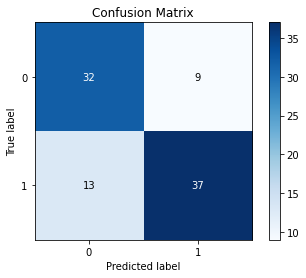

In [111]:
print(metrics.confusion_matrix(y_test, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [112]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7582417582417582
Precision: 0.8043478260869565
Recall: 0.74


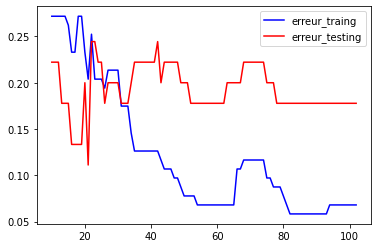

In [131]:
m=X_train.shape[0]
er_tr,er_val=overfitting(X_train,y_train,X_val,y_val,model=SVM)
plt.plot(range(10,m),er_tr, 'b-',label='erreur_traing' )
plt.plot(range(10,m),er_val,'r-',label='erreur_testing')  
plt.legend()
plt.show()

# f) gradient boosting classifier: 

In [113]:
gb_clf = GradientBoostingClassifier(n_estimators=60, learning_rate=0.09, max_depth=3, random_state=0).fit(X_train, y_train)

In [114]:
gb_clf.score(X_test, y_test)

0.7582417582417582

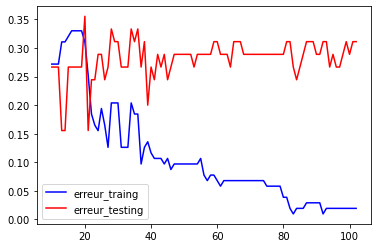

In [132]:
m=X_train.shape[0]
er_tr,er_val=overfitting(X_train,y_train,X_val,y_val,model=gb_clf)
plt.plot(range(10,m),er_tr, 'b-',label='erreur_traing' )
plt.plot(range(10,m),er_val,'r-',label='erreur_testing')  
plt.legend()
plt.show()

# g) Logistic regression:

In [72]:
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(X_train,y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [73]:
y_pred = modele_logit.predict(X_test)

[[32  9]
 [ 7 43]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

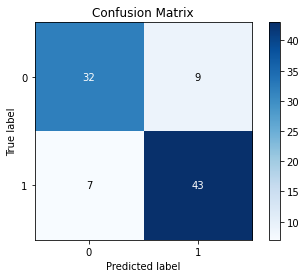

In [74]:
print(metrics.confusion_matrix(y_test, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [75]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8241758241758241
Precision: 0.8269230769230769
Recall: 0.86


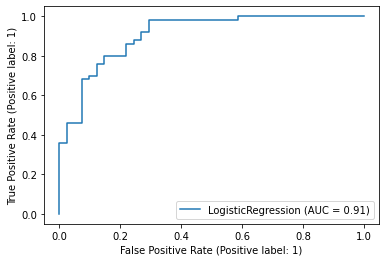

In [85]:
import scikitplot as skplt
import matplotlib.pyplot as plt

metrics.plot_roc_curve(modele_logit, X_test, y_test)
plt.show()